# Explore here

In [ ]:
# Your code here

#### --- 0-0 (Identificación del Proyecto) ---
- **Project: Predicción de Nivel y Flujo de Agua en Cuerpos Hídricos de Acea Group**
- **Source**: Datos proporcionados por Acea Group (CSV files).
- **Date**: 2025-06-01 (fecha de inicio del proyecto)
- **Goal**: Crear modelos de predicción de series de tiempo para pronosticar la disponibilidad de agua (nivel o flujo) en diferentes cuerpos hídricos, considerando sus características únicas y la influencia de factores externos con posibles rezagos. Los modelos deben ser robustos, generalizables por categoría de cuerpo de agua (acuífero, manantial, río, lago) y aplicables a cada cuerpo de agua individual.

In [1]:
# (Importación de librerías)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split # Usar con precaución para series de tiempo, se recomienda split manual
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Para escalado de datos
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib # Para guardar modelos
import warnings

### **1. Data loading**

**Objective**: Obtain the data from source and get a first glimpse of their properties and presentation


In [6]:

data_raw_path = '../data/raw/'

In [7]:
# Lista de los nombres de los archivos CSV

csv_files = [
    'Aquifer_Auser.csv',
    'Aquifer_Petrignano.csv',
    'Aquifer_Doganella.csv',
    'Aquifer_Luco.csv',
    'Water_Spring_Amiata.csv',
    'Water_Spring_Madonna_di_Canneto.csv',
    'Water_Spring_Lupa.csv',
    'River_Arno.csv',
    'Lake_Bilancino.csv'
]
print(csv_files)

['Aquifer_Auser.csv', 'Aquifer_Petrignano.csv', 'Aquifer_Doganella.csv', 'Aquifer_Luco.csv', 'Water_Spring_Amiata.csv', 'Water_Spring_Madonna_di_Canneto.csv', 'Water_Spring_Lupa.csv', 'River_Arno.csv', 'Lake_Bilancino.csv']


In [10]:
# Diccionario para almacenar los DataFrames cargados
raw_dfs = {}

print("Cargando datasets raw...")
for file_name in csv_files:
    waterbody_name = file_name.replace('.csv', '') # Obtener el nombre del cuerpo de agua
    file_path = os.path.join(data_raw_path, file_name)
    try:
        df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True) #Indica que el día viene primero en el formato de la fecha
        # Para Asegurarse de que la columna 'Date' esté en formato de fecha y hora
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.set_index('Date').sort_index() # Establecer 'Date' como índice y ordenar
        raw_dfs[waterbody_name] = df
        print(f"  - '{waterbody_name}' cargado. Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
    except FileNotFoundError:
        print(f"  - ¡Error! Archivo no encontrado: {file_path}")
    except KeyError:
        print(f"  - ¡Error! Columna 'Date' no encontrada en {file_path}. Verifique el nombre de la columna de fecha/hora.")
    except Exception as e:
        print(f"  - Error al cargar {file_path}: {e}")

Cargando datasets raw...
  - 'Aquifer_Auser' cargado. Filas: 8154, Columnas: 26
  - 'Aquifer_Petrignano' cargado. Filas: 5223, Columnas: 7
  - 'Aquifer_Doganella' cargado. Filas: 6026, Columnas: 21
  - 'Aquifer_Luco' cargado. Filas: 7487, Columnas: 21
  - 'Water_Spring_Amiata' cargado. Filas: 7487, Columnas: 15
  - 'Water_Spring_Madonna_di_Canneto' cargado. Filas: 3113, Columnas: 3
  - 'Water_Spring_Lupa' cargado. Filas: 4199, Columnas: 2
  - 'River_Arno' cargado. Filas: 8217, Columnas: 16
  - 'Lake_Bilancino' cargado. Filas: 6603, Columnas: 8


In [16]:
print("\nPrimer vistazo a los datos Aquifer_Auser:")

if 'Aquifer_Auser' in raw_dfs:
    print("\n--- Aquifer_Auser Head ---")
    print(raw_dfs['Aquifer_Auser'].head())
    print("\n--- Aquifer_Auser Info ---")
    raw_dfs['Aquifer_Auser'].info()
    print("\n--- Aquifer_Auser Describe ---")
    print(raw_dfs['Aquifer_Auser'].describe())
else:
    print("\n'Aquifer_Auser' no se cargó, no se puede mostrar el ejemplo.")


Primer vistazo a los datos Aquifer_Auser:

--- Aquifer_Auser Head ---
            Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
Date                                                                        
1998-03-05                 NaN                  NaN                   NaN   
1998-03-06                 NaN                  NaN                   NaN   
1998-03-07                 NaN                  NaN                   NaN   
1998-03-08                 NaN                  NaN                   NaN   
1998-03-09                 NaN                  NaN                   NaN   

            Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
Date                                                                          
1998-03-05                NaN                       NaN                 NaN   
1998-03-06                NaN                       NaN                 NaN   
1998-03-07                NaN                       NaN                 N

In [15]:
print("\nPrimer vistazo a los datos Aquifer_Petrignano:")

if 'Aquifer_Petrignano' in raw_dfs:
    print("\n--- Aquifer_Petrignano Head ---")
    print(raw_dfs['Aquifer_Petrignano'].head())
    print("\n--- Aquifer_Petrignano Info ---")
    raw_dfs['Aquifer_Petrignano'].info()
    print("\n--- Aquifer_Petrignano Describe ---")
    print(raw_dfs['Aquifer_Petrignano'].describe())
else:
    print("\n'Aquifer_Petrignano' no se cargó, no se puede mostrar el ejemplo.")


Primer vistazo a los datos Aquifer_Petrignano:

--- Aquifer_Petrignano Head ---
            Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
Date                                                          
2006-03-14                    NaN                    -22.48   
2006-03-15                    NaN                    -22.38   
2006-03-16                    NaN                    -22.25   
2006-03-17                    NaN                    -22.38   
2006-03-18                    NaN                    -22.60   

            Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  \
Date                                                             
2006-03-14                    -22.18                       NaN   
2006-03-15                    -22.14                       NaN   
2006-03-16                    -22.04                       NaN   
2006-03-17                    -22.04                       NaN   
2006-03-18                    -22.04                       NaN   

            Te

In [18]:
print("\nPrimer vistazo a los datos Aquifer_Doganella:")

if 'Aquifer_Doganella' in raw_dfs:
    print("\n--- Aquifer_Doganella Head ---")
    print(raw_dfs['Aquifer_Doganella'].head())
    print("\n--- Aquifer_Doganella Info ---")
    raw_dfs['Aquifer_Doganella'].info()
    print("\n--- Aquifer_Doganella Describe ---")
    print(raw_dfs['Aquifer_Doganella'].describe())
else:
    print("\n'Aquifer_Doganella' no se cargó, no se puede mostrar el ejemplo.")


Primer vistazo a los datos Aquifer_Doganella:

--- Aquifer_Doganella Head ---
            Rainfall_Monteporzio  Rainfall_Velletri  \
Date                                                  
2004-01-01                   0.0                0.0   
2004-01-02                   0.2                0.8   
2004-01-03                   0.0                0.0   
2004-01-04                   0.0                0.0   
2004-01-05                   0.2                0.0   

            Depth_to_Groundwater_Pozzo_1  Depth_to_Groundwater_Pozzo_2  \
Date                                                                     
2004-01-01                           NaN                           NaN   
2004-01-02                           NaN                           NaN   
2004-01-03                           NaN                           NaN   
2004-01-04                           NaN                           NaN   
2004-01-05                           NaN                           NaN   

            Dept

In [20]:
print("\nPrimer vistazo a los datos Aquifer_Luco:")

if 'Aquifer_Luco' in raw_dfs:
    print("\n--- Aquifer_Luco Head ---")
    print(raw_dfs['Aquifer_Luco'].head())
    print("\n--- Aquifer_Luco Info ---")
    raw_dfs['Aquifer_Luco'].info()
    print("\n--- Aquifer_Luco Describe ---")
    print(raw_dfs['Aquifer_Luco'].describe())
else:
    print("\n'Aquifer_Luco' no se cargó, no se puede mostrar el ejemplo.")


Primer vistazo a los datos Aquifer_Luco:

--- Aquifer_Luco Head ---
            Rainfall_Simignano  Rainfall_Siena_Poggio_al_Vento  \
Date                                                             
2000-01-01                 NaN                             NaN   
2000-01-02                 NaN                             NaN   
2000-01-03                 NaN                             NaN   
2000-01-04                 NaN                             NaN   
2000-01-05                 NaN                             NaN   

            Rainfall_Mensano  Rainfall_Montalcinello  \
Date                                                   
2000-01-01               NaN                     NaN   
2000-01-02               NaN                     NaN   
2000-01-03               NaN                     NaN   
2000-01-04               NaN                     NaN   
2000-01-05               NaN                     NaN   

            Rainfall_Monticiano_la_Pineta  Rainfall_Sovicille  \
Date      

In [ ]:
print("\nPrimer vistazo a los datos Water_Spring_Amiata:")

if 'Water_Spring_Amiata' in raw_dfs:
    print("\n--- Water_Spring_Amiata ---")
    print(raw_dfs['Water_Spring_Amiata'].head())
    print("\n--- Water_Spring_Amiata Info ---")
    raw_dfs['Water_Spring_Amiata'].info()
    print("\n--- Water_Spring_Amiata Describe ---")
    print(raw_dfs['Water_Spring_Amiata'].describe())
else:
    print("\n'Water_Spring_Amiata' no se cargó, no se puede mostrar el ejemplo.")


Primer vistazo a los datos Water_Spring_Amiata:

--- Water_Spring_Amiata ---
            Rainfall_Castel_del_Piano  Rainfall_Abbadia_S_Salvatore  \
Date                                                                  
2000-01-01                        NaN                           NaN   
2000-01-02                        NaN                           NaN   
2000-01-03                        NaN                           NaN   
2000-01-04                        NaN                           NaN   
2000-01-05                        NaN                           NaN   

            Rainfall_S_Fiora  Rainfall_Laghetto_Verde  Rainfall_Vetta_Amiata  \
Date                                                                           
2000-01-01               NaN                      NaN                    NaN   
2000-01-02               NaN                      NaN                    NaN   
2000-01-03               NaN                      NaN                    NaN   
2000-01-04              

In [22]:
print("\nPrimer vistazo a los datos Water_Spring_Madonna_di_Canneto:")

if 'Water_Spring_Madonna_di_Canneto' in raw_dfs:
    print("\n--- Water_Spring_Madonna_di_Canneto ---")
    print(raw_dfs['Water_Spring_Madonna_di_Canneto'].head())
    print("\n--- Water_Spring_Madonna_di_Canneto Info ---")
    raw_dfs['Water_Spring_Madonna_di_Canneto'].info()
    print("\n--- Water_Spring_Madonna_di_Canneto Describe ---")
    print(raw_dfs['Water_Spring_Madonna_di_Canneto'].describe())
else:
    print("\n'Water_Spring_Madonna_di_Canneto' no se cargó, no se puede mostrar el ejemplo.")


Primer vistazo a los datos Water_Spring_Madonna_di_Canneto:

--- Water_Spring_Madonna_di_Canneto ---
            Rainfall_Settefrati  Temperature_Settefrati  \
Date                                                      
2012-01-01                  0.0                    5.25   
2012-01-02                  5.6                    6.65   
2012-01-03                 10.0                    8.85   
2012-01-04                  0.0                    6.75   
2012-01-05                  1.0                    5.55   

            Flow_Rate_Madonna_di_Canneto  
Date                                      
2012-01-01                           NaN  
2012-01-02                           NaN  
2012-01-03                           NaN  
2012-01-04                           NaN  
2012-01-05                           NaN  

--- Water_Spring_Madonna_di_Canneto Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3113 entries, 2012-01-01 to NaT
Data columns (total 3 columns):
 #   Column         

In [25]:
print("\nPrimer vistazo a los datos Water_Spring_Lupa:")

if 'Water_Spring_Lupa' in raw_dfs:
    print("\n--- Water_Spring_Lupa ---")
    print(raw_dfs['Water_Spring_Lupa'].head())
    print("\n--- Water_Spring_Lupa Info ---")
    raw_dfs['Water_Spring_Lupa'].info()
    print("\n--- Water_Spring_Lupa Describe ---")
    print(raw_dfs['Water_Spring_Lupa'].describe())
else:
    print("\n'Water_Spring_Lupa' no se cargó, no se puede mostrar el ejemplo.")


Primer vistazo a los datos Water_Spring_Lupa:

--- Water_Spring_Lupa ---
            Rainfall_Terni  Flow_Rate_Lupa
Date                                      
2009-01-01           2.797             NaN
2009-01-02           2.797             NaN
2009-01-03           2.797             NaN
2009-01-04           2.797             NaN
2009-01-05           2.797             NaN

--- Water_Spring_Lupa Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4199 entries, 2009-01-01 to 2020-06-30
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rainfall_Terni  4199 non-null   float64
 1   Flow_Rate_Lupa  3817 non-null   float64
dtypes: float64(2)
memory usage: 98.4 KB

--- Water_Spring_Lupa Describe ---
       Rainfall_Terni  Flow_Rate_Lupa
count     4199.000000     3817.000000
mean         2.466355      -97.712916
std          2.041837       15.026314
min          0.000000     -182.310000
25%          1.402000 

In [24]:
print("\nPrimer vistazo a los datos River_Arno:")

if 'River_Arno' in raw_dfs:
    print("\n--- River_Arno ---")
    print(raw_dfs['River_Arno'].head())
    print("\n--- River_Arno Info ---")
    raw_dfs['River_Arno'].info()
    print("\n--- River_Arno Describe ---")
    print(raw_dfs['River_Arno'].describe())
else:
    print("\n'River_Arno' no se cargó, no se puede mostrar el ejemplo.")


Primer vistazo a los datos River_Arno:

--- River_Arno ---
            Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
Date                                                                  
1998-01-01                NaN                 NaN               NaN   
1998-01-02                NaN                 NaN               NaN   
1998-01-03                NaN                 NaN               NaN   
1998-01-04                NaN                 NaN               NaN   
1998-01-05                NaN                 NaN               NaN   

            Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  \
Date                                                              
1998-01-01               NaN               NaN              NaN   
1998-01-02               NaN               NaN              NaN   
1998-01-03               NaN               NaN              NaN   
1998-01-04               NaN               NaN              NaN   
1998-01-05               NaN            

In [23]:
print("\nPrimer vistazo a los datos Lake_Bilancino:")

if 'Lake_Bilancino' in raw_dfs:
    print("\n--- Lake_Bilancino ---")
    print(raw_dfs['Lake_Bilancino'].head())
    print("\n--- Lake_Bilancino Info ---")
    raw_dfs['Lake_Bilancino'].info()
    print("\n--- Lake_Bilancino Describe ---")
    print(raw_dfs['Lake_Bilancino'].describe())
else:
    print("\n'Lake_Bilancino' no se cargó, no se puede mostrar el ejemplo.")


Primer vistazo a los datos Lake_Bilancino:

--- Lake_Bilancino ---
            Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
Date                                                               
2002-06-03               NaN               NaN               NaN   
2002-06-04               NaN               NaN               NaN   
2002-06-05               NaN               NaN               NaN   
2002-06-06               NaN               NaN               NaN   
2002-06-07               NaN               NaN               NaN   

            Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  \
Date                                                                      
2002-06-03                 NaN                NaN                   NaN   
2002-06-04                 NaN                NaN                   NaN   
2002-06-05                 NaN                NaN                   NaN   
2002-06-06                 NaN                NaN                   NaN   
2002-

### **2. Data preprocessing** 
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [26]:
# Copiar el diccionario para df_baking
df_baking = raw_dfs.copy() # Se crea una copia inicial de los raw DataFrames

In [27]:
print("\nIniciando preprocesamiento de datos...")
preprocessed_dfs = {}


Iniciando preprocesamiento de datos...


In [28]:
# Mapeo de cuerpos de agua a sus features a predecir
waterbody_targets = {
    'Aquifer_Auser': ['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_COS', 'Depth_to_Groundwater_LT2'],
    'Aquifer_Petrignano': ['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25'],
    'Aquifer_Doganella': [f'Depth_to_Groundwater_Pozzo_{i}' for i in range(1, 10)],
    'Aquifer_Luco': ['Depth_to_Groundwater_Podere_Casetta'],
    'Water_Spring_Amiata': ['Flow_Rate_Bugnano', 'Flow_Rate_Arbure', 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta'],
    'Water_Spring_Madonna_di_Canneto': ['Flow_Rate_Madonna_di_Canneto'],
    'Water_Spring_Lupa': ['Flow_Rate_Lupa'],
    'River_Arno': ['Hydrometry_Nave_di_Rosano'],
    'Lake_Bilancino': ['Lake_Level', 'Flow_Rate']
}

In [47]:
# --- 2. Data preprocessing ---
### **Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mismatching, noisy data or data not wrangled

print("\nIniciando preprocesamiento de datos...")
preprocessed_dfs = {} # ESTA LÍNEA DEBE ESTAR ANTES DEL BUCLE

# Bucle principal que itera sobre CADA DataFrame en df_baking
for waterbody_name, df in df_baking.items():
    print(f"\nPreprocesando '{waterbody_name}'...")

    # 2.1. Manejo de valores faltantes (Missing Values)
    initial_nan_count = df.isnull().sum().sum()
    df.interpolate(method='linear', limit_direction='both', inplace=True)
    if df.isnull().sum().sum() > 0:
        df.fillna(df.mean(), inplace=True)
    if initial_nan_count > 0:
        print(f"  - NaN values handled. Initial: {initial_nan_count}, After interpolation: {df.isnull().sum().sum()}")

    # 2.2. Feature Engineering: Lag de variables exógenas (Rainfall, Temperature)
    # Identifica columnas de lluvia y temperatura
    rainfall_cols = [col for col in df.columns if 'Rainfall' in col]
    temperature_cols = [col for col in df.columns if 'Temperature' in col]

    # Lags de ejemplo (días).
    lags = [1, 2, 3, 7, 14, 30]

    # Creamos un DataFrame temporal para almacenar las nuevas columnas con lag
    # Esto es para evitar el PerformanceWarning y manejar mejor la adición de columnas
    current_waterbody_lagged_features = pd.DataFrame(index=df.index)

    for col in rainfall_cols + temperature_cols:
        if col in df.columns:
            print(f"  - Creando lagged features para '{col}'...")
            for lag in lags:
                new_col_name = f'{col}_lag_{lag}d'
                # Asignamos directamente a un DataFrame temporal para luego concatenar
                current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
                # Rellenar con la media para evitar NaN. Usamos la forma recomendada para evitar FutureWarnings.
                current_waterbody_lagged_features[new_col_name] = current_waterbody_lagged_features[new_col_name].fillna(df[col].mean())
    
    # Concatenar el DataFrame original con las nuevas columnas lagged
    df = pd.concat([df, current_waterbody_lagged_features], axis=1)

    # Opcional: para desfragmentar el DataFrame después de muchas operaciones
    # df = df.copy() 
    # ^^^ Quita el comentario de esta línea si notas problemas de rendimiento a pesar de la concatenación.

    # 2.3. Conversión de etiquetas categóricas en valores numéricos (Placeholder)
    # (Deja esta sección comentada a menos que tengas columnas categóricas)
    # for column in df.select_dtypes(include='object').columns:
    #     df = pd.get_dummies(df, columns=[column], prefix=column, drop_first=True)
    #     print(f"  - One-hot encoded '{column}'")

    # 2.4. Reducción de datos / Selección de características (si es necesario) (Placeholder)

    # 2.5. Asegurar consistencia de frecuencia (si es necesario) (Placeholder)

    # ESTA LÍNEA DEBE ESTAR DENTRO DEL PRIMER BUCLE 'for waterbody_name, df in df_baking.items():'
    # PARA GUARDAR CADA DATAFRAME PROCESADO
    preprocessed_dfs[waterbody_name] = df.copy() # Guardar la copia preprocesada

print("\nPreprocesamiento completado. Creando 'df' para el siguiente paso.")
# ESTA LÍNEA DEBE ESTAR FUERA DEL BUCLE, DESPUÉS DE QUE TODOS LOS DATAFRAMES SE HAYAN PROCESADO
df_processed = preprocessed_dfs.copy() # Esta será tu 'df'


Iniciando preprocesamiento de datos...

Preprocesando 'Aquifer_Auser'...
  - Creando lagged features para 'Rainfall_Gallicano'...
  - Creando lagged features para 'Rainfall_Pontetetto'...
  - Creando lagged features para 'Rainfall_Monte_Serra'...
  - Creando lagged features para 'Rainfall_Orentano'...
  - Creando lagged features para 'Rainfall_Borgo_a_Mozzano'...
  - Creando lagged features para 'Rainfall_Piaggione'...
  - Creando lagged features para 'Rainfall_Calavorno'...
  - Creando lagged features para 'Rainfall_Croce_Arcana'...
  - Creando lagged features para 'Rainfall_Tereglio_Coreglia_Antelminelli'...
  - Creando lagged features para 'Rainfall_Fabbriche_di_Vallico'...
  - Creando lagged features para 'Temperature_Orentano'...
  - Creando lagged features para 'Temperature_Monte_Serra'...
  - Creando lagged features para 'Temperature_Ponte_a_Moriano'...
  - Creando lagged features para 'Temperature_Lucca_Orto_Botanico'...

Preprocesando 'Aquifer_Petrignano'...
  - Creando lagge

/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  - Creando lagged features para 'Rainfall_Le_Croci_lag_2d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_3d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_7d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_14d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_30d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_1d_lag_1d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_1d_lag_2d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_1d_lag_3d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_1d_lag_7d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_1d_lag_14d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_1d_lag_30d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_2d_lag_1d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_2d_lag_2d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_2d_lag_3d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_2d_la

/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  - Creando lagged features para 'Rainfall_Mangona_lag_7d_lag_30d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_14d_lag_1d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_14d_lag_2d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_14d_lag_3d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_14d_lag_7d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_14d_lag_14d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_14d_lag_30d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_30d_lag_1d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_30d_lag_2d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_30d_lag_3d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_30d_lag_7d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_30d_lag_14d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_30d_lag_30d'...
  - Creando lagged features para 'Rainfall_S_Agata_lag_1d_lag_1d'...
  - Creando lagge

/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  - Creando lagged features para 'Rainfall_Cavallina_lag_2d_lag_30d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_3d_lag_1d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_3d_lag_2d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_3d_lag_3d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_3d_lag_7d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_3d_lag_14d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_3d_lag_30d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_7d_lag_1d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_7d_lag_2d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_7d_lag_3d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_7d_lag_7d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_7d_lag_14d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_7d_lag_30d'...
  - Creando lagged features para 'Rainfall_Cavallina_lag_14d_lag_1d'...


/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  - Creando lagged features para 'Rainfall_Le_Croci_lag_14d_lag_7d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_14d_lag_14d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_14d_lag_30d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_30d_lag_1d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_30d_lag_2d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_30d_lag_3d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_30d_lag_7d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_30d_lag_14d'...
  - Creando lagged features para 'Rainfall_Le_Croci_lag_30d_lag_30d'...
  - Creando lagged features para 'Temperature_Le_Croci'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_1d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_2d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_3d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_7d'...
  - Creando lagged features para '

/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_waterbody_lagged_features[new_col_name] = df[col].shift(lag)
/tmp/ipykernel_3304/835926946.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  - Creando lagged features para 'Temperature_Le_Croci_lag_7d_lag_14d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_7d_lag_30d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_14d_lag_1d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_14d_lag_2d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_14d_lag_3d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_14d_lag_7d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_14d_lag_14d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_14d_lag_30d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_30d_lag_1d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_30d_lag_2d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_30d_lag_3d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_30d_lag_7d'...
  - Creando lagged features para 'Temperature_Le_Croci_lag_30d_lag_14d'...
  - Creando lagged features para 'T

In [ ]:
print("\n--- Verificación de df_processed ---")

# 1. Mostrar las claves (nombres de los cuerpos de agua) en df_processed
print("\nNombres de los cuerpos de agua en df_processed:")
print(df_processed.keys())

# 2. Mostrar la cantidad total de DataFrames en df_processed
print(f"\nCantidad total de DataFrames preprocesados: {len(df_processed)}")

# 3. Mostrar las primeras filas (head) de un DataFrame específico ('Aquifer_Doganella')
# para confirmar que contiene las nuevas columnas de lagged features
if 'Aquifer_Doganella' in df_processed:
    print("\nPrimeras filas del DataFrame 'Aquifer_Doganella' (después de preprocesamiento y lagged features):")
    print(df_processed['Aquifer_Doganella'].head())
    print(f"\nNúmero de columnas de 'Aquifer_Doganella': {df_processed['Aquifer_Doganella'].shape[1]}")
else:
    print("\n'Aquifer_Doganella' no se encontró en df_processed. Algo salió mal.")

# 4. Confirmar que las columnas de lag existen en un DataFrame
if 'Aquifer_Auser' in df_processed:
    print("\nColumnas del DataFrame 'Aquifer_Auser' (ejemplo de lagged features):")
    # Mostrar algunas de las nuevas columnas de lag para verificar
    example_cols = [col for col in df_processed['Aquifer_Auser'].columns if '_lag_' in col]
    if example_cols:
        print(example_cols[:5]) # Mostrar solo las primeras 5 para no saturar
    else:
        print("No se encontraron columnas lagged en 'Aquifer_Auser'.")


--- Verificación de df_processed ---

Nombres de los cuerpos de agua en df_processed:
dict_keys(['Aquifer_Auser', 'Aquifer_Petrignano', 'Aquifer_Doganella', 'Aquifer_Luco', 'Water_Spring_Amiata', 'Water_Spring_Madonna_di_Canneto', 'Water_Spring_Lupa', 'River_Arno', 'Lake_Bilancino'])

Cantidad total de DataFrames preprocesados: 9

Primeras filas del DataFrame 'Aquifer_Doganella' (después de preprocesamiento y lagged features):
            Rainfall_Monteporzio  Rainfall_Velletri  \
Date                                                  
2004-01-01                   0.0                0.0   
2004-01-02                   0.2                0.8   
2004-01-03                   0.0                0.0   
2004-01-04                   0.0                0.0   
2004-01-05                   0.2                0.0   

            Depth_to_Groundwater_Pozzo_1  Depth_to_Groundwater_Pozzo_2  \
Date                                                                     
2004-01-01                        

In [ ]:
#for waterbody_name, df in df_baking.items():
    #print(f"\nPreprocesando '{waterbody_name}'...")

    # 2.1. Manejo de valores faltantes (Missing Values)
    #initial_nan_count = df.isnull().sum().sum()
    #df.interpolate(method='linear', limit_direction='both', inplace=True)
    #if df.isnull().sum().sum() > 0:
        #df.fillna(df.mean(), inplace=True)
    #if initial_nan_count > 0:
        #print(f"  - NaN values handled. Initial: {initial_nan_count}, After interpolation: {df.isnull().sum().sum()}")


Preprocesando 'Aquifer_Auser'...
  - NaN values handled. Initial: 64410, After interpolation: 0

Preprocesando 'Aquifer_Petrignano'...
  - NaN values handled. Initial: 4388, After interpolation: 0

Preprocesando 'Aquifer_Doganella'...
  - NaN values handled. Initial: 73392, After interpolation: 0

Preprocesando 'Aquifer_Luco'...
  - NaN values handled. Initial: 80610, After interpolation: 0

Preprocesando 'Water_Spring_Amiata'...
  - NaN values handled. Initial: 61607, After interpolation: 0

Preprocesando 'Water_Spring_Madonna_di_Canneto'...
  - NaN values handled. Initial: 2838, After interpolation: 0

Preprocesando 'Water_Spring_Lupa'...
  - NaN values handled. Initial: 382, After interpolation: 0

Preprocesando 'River_Arno'...
  - NaN values handled. Initial: 67690, After interpolation: 0

Preprocesando 'Lake_Bilancino'...
  - NaN values handled. Initial: 3484, After interpolation: 0


In [ ]:
# 2.2. Feature Engineering: Lag de variables exógenas (Rainfall, Temperature)
# Se sabe que Rainfall y Temperature afectan las features a predecir con un retraso.
# Este es un paso CRÍTICO y experimental. Se debe probar diferentes lags.
# Se crearán columnas con datos de lluvia y temperatura de días/semanas/meses anteriores.
#ainfall_cols = [col for col in df.columns if 'Rainfall' in col]
#temperature_cols = [col for col in df.columns if 'Temperature' in col]

#lags = [1, 2, 3, 7, 14, 30] # Lags comunes: 1 día, 2 días, 3 días, 1 semana, 2 semanas, 1 mes

#for col in rainfall_cols + temperature_cols:
    #if col in df.columns:
        #print(f"  - Creando lagged features para '{col}'...")
        #for lag in lags:
            #df[f'{col}_lag_{lag}d'] = df[col].shift(lag)
        #df[f'{col}_lag_{lag}d'] = df[f'{col}_lag_{lag}d'].fillna(df[col].mean()) # Rellenar con la media para evitar NaN

  - Creando lagged features para 'Rainfall_S_Piero'...
  - Creando lagged features para 'Rainfall_Mangona'...
  - Creando lagged features para 'Rainfall_S_Agata'...
  - Creando lagged features para 'Rainfall_Cavallina'...
  - Creando lagged features para 'Rainfall_Le_Croci'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_1d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_2d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_3d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_7d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_14d'...
  - Creando lagged features para 'Rainfall_S_Piero_lag_30d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_1d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_2d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_3d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_7d'...
  - Creando lagged features para 'Rainfall_Mangona_lag_14d'...
  - Creando lagged features para 'Rai

/tmp/ipykernel_3304/4161398909.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}d'] = df[col].shift(lag)
/tmp/ipykernel_3304/4161398909.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}d'] = df[col].shift(lag)
/tmp/ipykernel_3304/4161398909.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

In [ ]:
#preprocessed_dfs[waterbody_name] = df.copy() # Guardar la copia preprocesada

#print("\nPreprocesamiento completado. Creando 'df' para el siguiente paso.")
#df_processed = preprocessed_dfs.copy() # Esta será tu 'df'


Preprocesamiento completado. Creando 'df' para el siguiente paso.


In [ ]:
#print("\n--- Verificación de df_processed ---")

# 1. Mostrar las claves (nombres de los cuerpos de agua) en df_processed
#print("\nNombres de los cuerpos de agua en df_processed:")
#print(df_processed.keys())

# 2. Mostrar la cantidad total de DataFrames en df_processed
#print(f"\nCantidad total de DataFrames preprocesados: {len(df_processed)}")

# 3. Mostrar las primeras filas (head) de un DataFrame específico (ej. 'Aquifer_Doganella')
# para confirmar que contiene las nuevas columnas de lagged features
#if 'Aquifer_Doganella' in df_processed:
    #print("\nPrimeras filas del DataFrame 'Aquifer_Doganella' (después de preprocesamiento y lagged features):")
    #print(df_processed['Aquifer_Doganella'].head())
    #print(f"\nNúmero de columnas de 'Aquifer_Doganella': {df_processed['Aquifer_Doganella'].shape[1]}")
#else:
    #print("\n'Aquifer_Doganella' no se encontró en df_processed. Algo salió mal.")

# 4. Opcional: Confirmar que las columnas de lag existen en un DataFrame
#if 'Aquifer_Auser' in df_processed:
    #print("\nColumnas del DataFrame 'Aquifer_Auser' (ejemplo de lagged features):")
    # Mostrar algunas de las nuevas columnas de lag para verificar
    #example_cols = [col for col in df_processed['Aquifer_Auser'].columns if '_lag_' in col]
    #if example_cols:
        print(example_cols[:5]) # Mostrar solo las primeras 5 para no saturar
    #else:
        #print("No se encontraron columnas lagged en 'Aquifer_Auser'.")


--- Verificación de df_processed ---

Nombres de los cuerpos de agua en df_processed:
dict_keys(['Lake_Bilancino'])

Cantidad total de DataFrames preprocesados: 1

'Aquifer_Doganella' no se encontró en df_processed. Algo salió mal.


### **3. Exploratory Data Analysis** 
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [49]:
print("\nIniciando Análisis Exploratorio de Datos (EDA)...")

eda_results = {}
for waterbody_name, df in df_processed.items():
    print(f"\n--- EDA para '{waterbody_name}' ---")
    eda_results[waterbody_name] = {}

    # 3.1. Estadísticas Descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    eda_results[waterbody_name]['describe'] = df.describe()


Iniciando Análisis Exploratorio de Datos (EDA)...

--- EDA para 'Aquifer_Auser' ---

Estadísticas descriptivas:
       Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
count          8154.00000          8154.000000           8154.000000   
mean             16.25688            11.386117             10.045757   
std              19.25812            13.418272             12.062062   
min               0.00000             0.000000              0.000000   
25%               0.00000             0.000000              0.000000   
50%               2.80000             1.600000              2.200000   
75%              37.20000            26.000000             21.400000   
max             318.80000           146.600000            152.200000   

       Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
count        8154.000000               8154.000000         8154.000000   
mean           17.192985                 13.281849           16.044199   
std            2


Visualizando series de tiempo para las variables a predecir: ['Lake_Level', 'Flow_Rate']


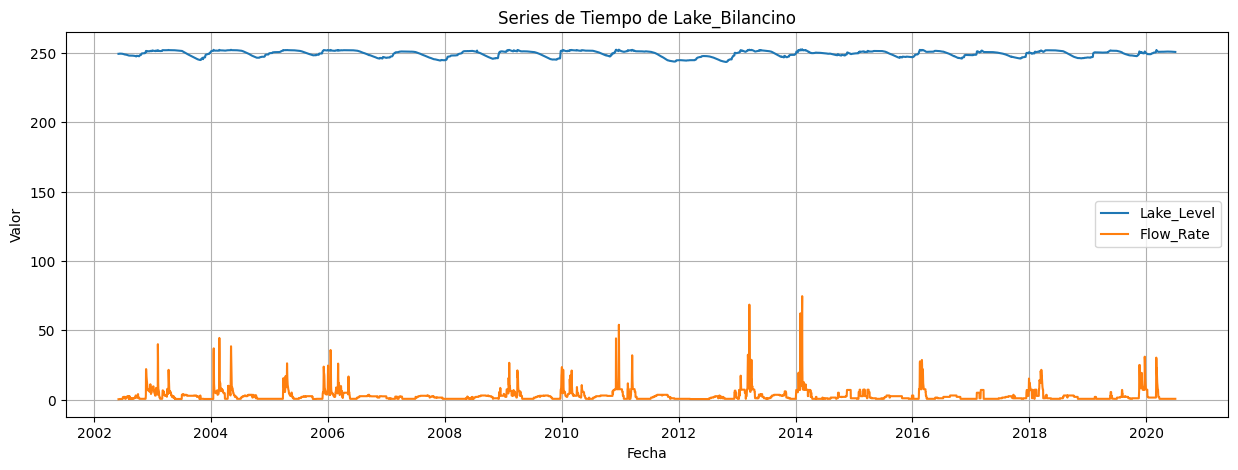

In [50]:
# 3.2. Visualización de la serie de tiempo de las variables a predecir
target_cols = waterbody_targets.get(waterbody_name, [])
if target_cols:
    print(f"\nVisualizando series de tiempo para las variables a predecir: {target_cols}")
    plt.figure(figsize=(15, 5))
    for col in target_cols:
        if col in df.columns:
            plt.plot(df.index, df[col], label=col)
        else:
            print(f"  - Advertencia: La columna target '{col}' no se encontró en '{waterbody_name}'.")
    plt.title(f'Series de Tiempo de {waterbody_name}')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()


Iniciando Análisis Exploratorio de Datos (EDA)...

--- EDA para 'Aquifer_Auser' ---

Estadísticas descriptivas:
       Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
count          8154.00000          8154.000000           8154.000000   
mean             16.25688            11.386117             10.045757   
std              19.25812            13.418272             12.062062   
min               0.00000             0.000000              0.000000   
25%               0.00000             0.000000              0.000000   
50%               2.80000             1.600000              2.200000   
75%              37.20000            26.000000             21.400000   
max             318.80000           146.600000            152.200000   

       Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
count        8154.000000               8154.000000         8154.000000   
mean           17.192985                 13.281849           16.044199   
std            2

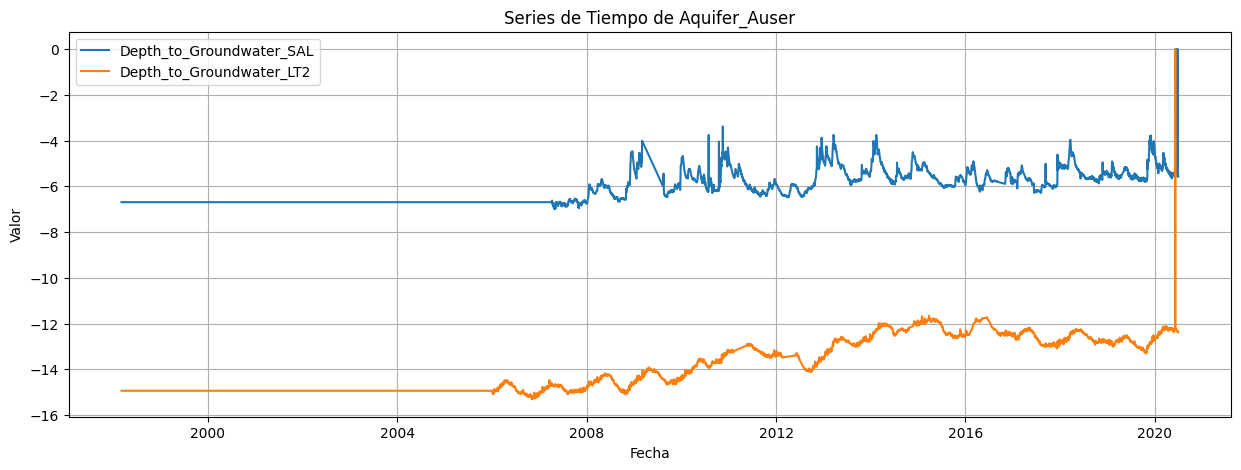


Matriz de correlación (heatmap) para las features relevantes y targets:


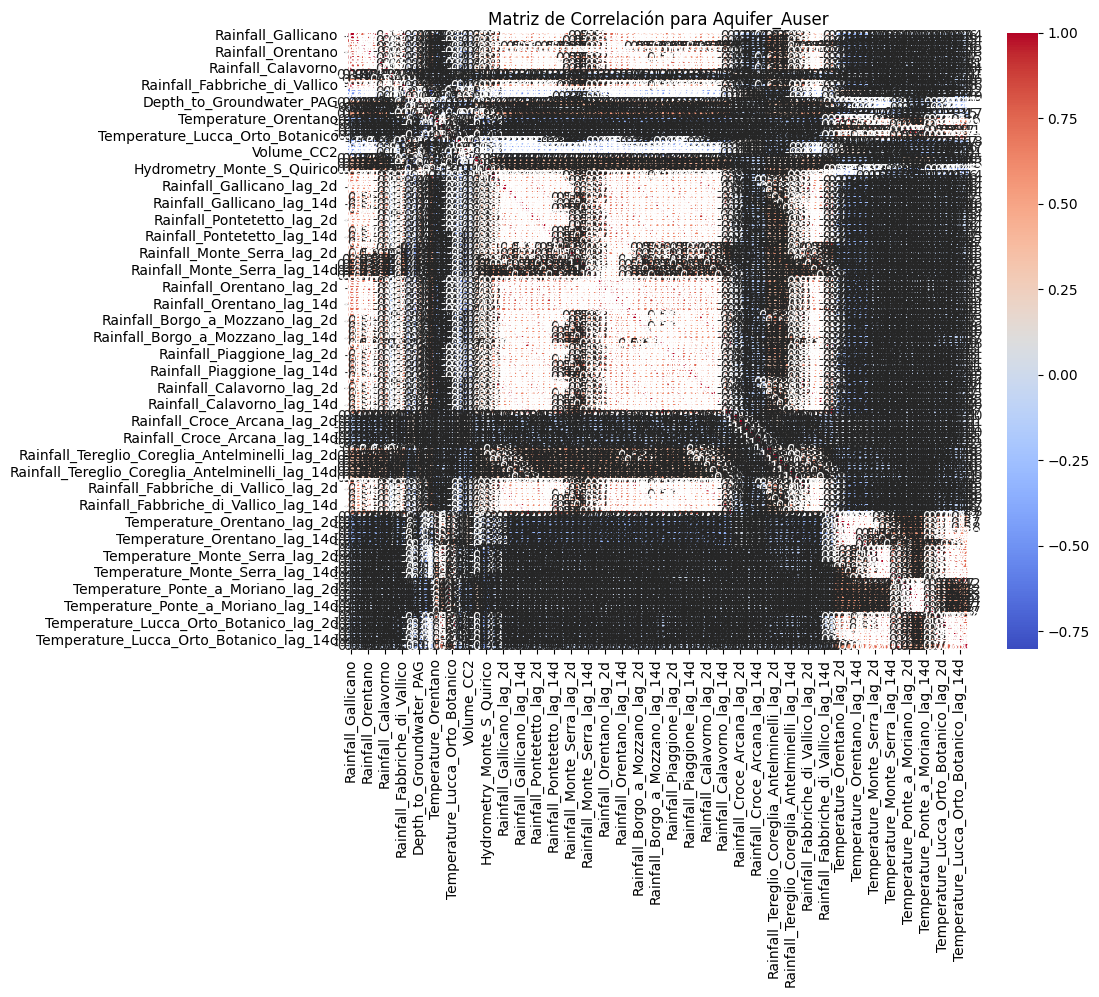


Observaciones clave del EDA:
  - [Escribe aquí las observaciones sobre tendencias, estacionalidad, valores atípicos, etc.]
  - [Escribe aquí cómo los lags de Rainfall/Temperature parecen correlacionarse con los targets.]

--- EDA para 'Aquifer_Petrignano' ---

Estadísticas descriptivas:
       Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
count            5223.000000               5223.000000   
mean                1.251446                -26.279945   
std                 4.719082                  3.314307   
min                 0.000000                -34.470000   
25%                 0.000000                -28.265000   
50%                 0.000000                -26.020000   
75%                 0.000000                -23.840000   
max                67.300000                -19.660000   

       Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  \
count               5223.000000               5223.000000   
mean                 -25.696110                 13.103006   
std  

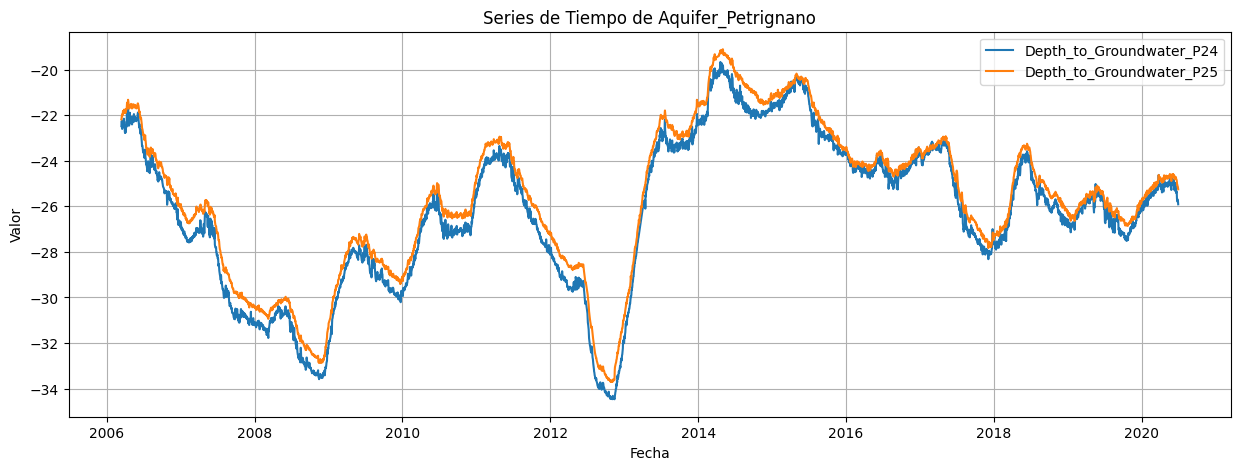


Matriz de correlación (heatmap) para las features relevantes y targets:


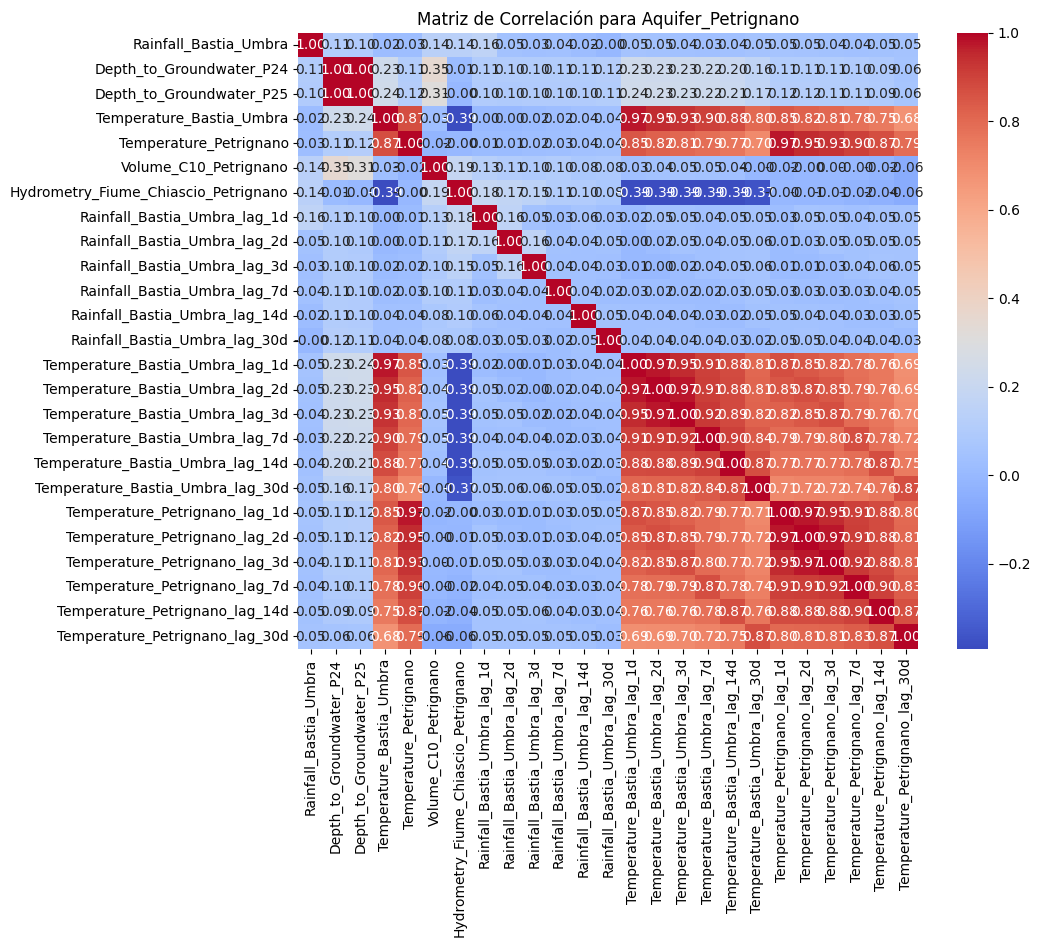


Observaciones clave del EDA:
  - [Escribe aquí las observaciones sobre tendencias, estacionalidad, valores atípicos, etc.]
  - [Escribe aquí cómo los lags de Rainfall/Temperature parecen correlacionarse con los targets.]

--- EDA para 'Aquifer_Doganella' ---

Estadísticas descriptivas:
       Rainfall_Monteporzio  Rainfall_Velletri  Depth_to_Groundwater_Pozzo_1  \
count           6026.000000        6026.000000                   6026.000000   
mean               2.868520           3.548938                    -45.391976   
std                8.382613           9.172352                     10.737713   
min                0.000000           0.000000                    -59.500000   
25%                0.000000           0.000000                    -53.450000   
50%                0.000000           0.000000                    -53.450000   
75%                0.800000           1.400000                    -35.065000   
max              112.600000         106.600000                    -20.31

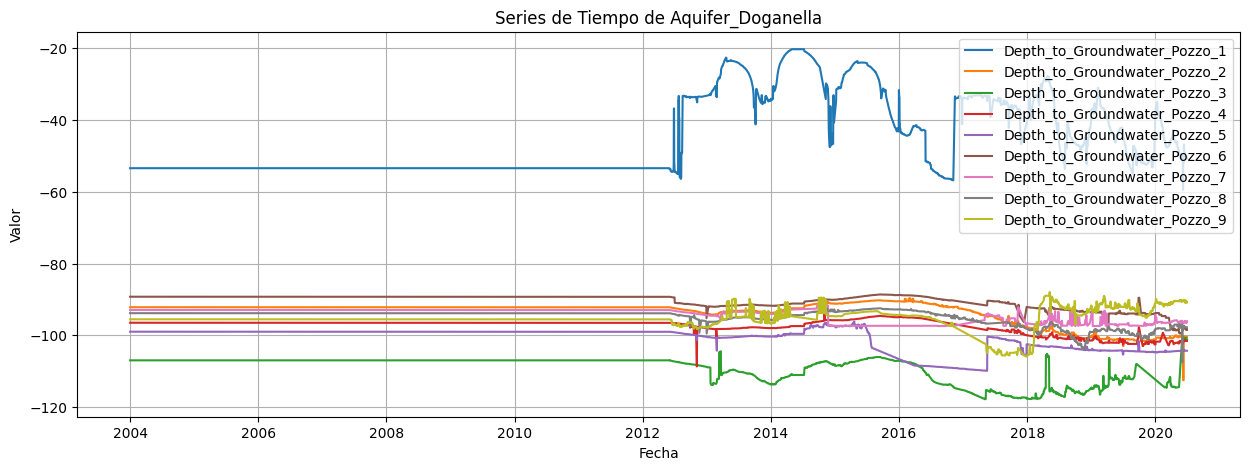


Matriz de correlación (heatmap) para las features relevantes y targets:


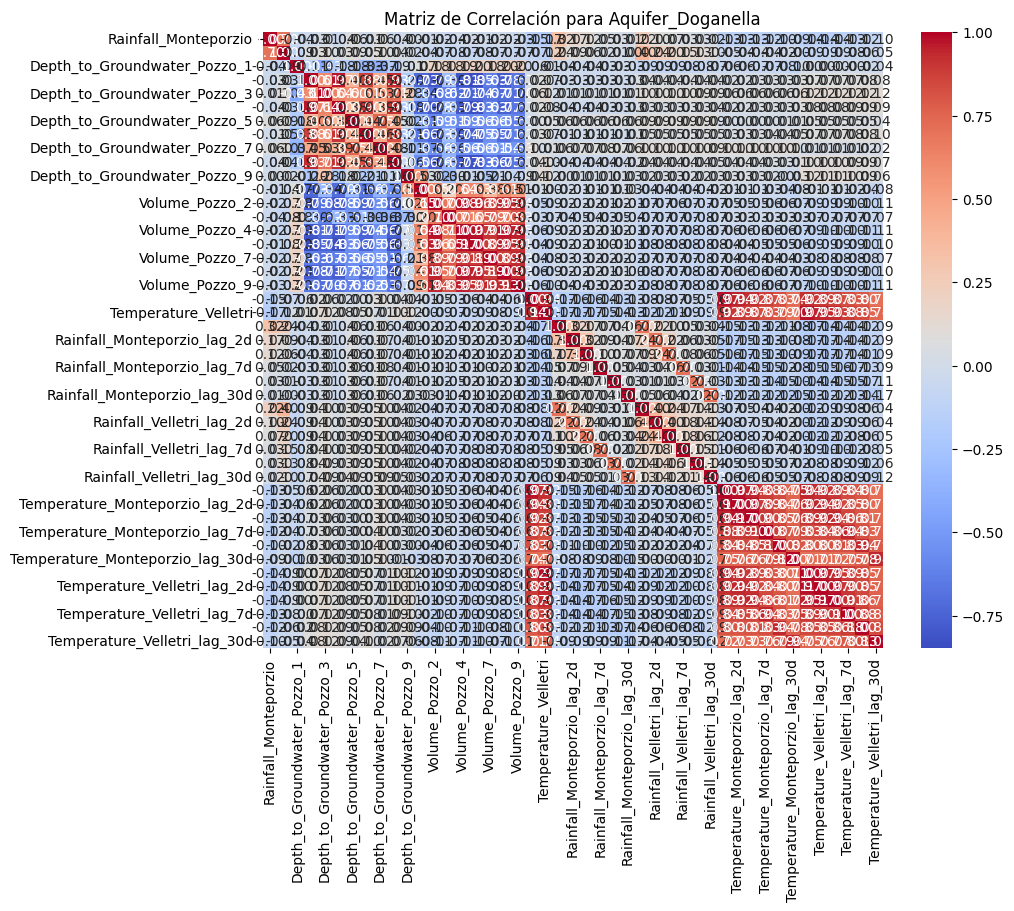


Observaciones clave del EDA:
  - [Escribe aquí las observaciones sobre tendencias, estacionalidad, valores atípicos, etc.]
  - [Escribe aquí cómo los lags de Rainfall/Temperature parecen correlacionarse con los targets.]

--- EDA para 'Aquifer_Luco' ---

Estadísticas descriptivas:
       Rainfall_Simignano  Rainfall_Siena_Poggio_al_Vento  Rainfall_Mensano  \
count         7487.000000                     7487.000000       7487.000000   
mean             2.536704                        0.288313          0.896968   
std              7.123134                        2.280393          5.012046   
min              0.000000                        0.000000          0.000000   
25%              0.000000                        0.000000          0.400000   
50%              0.000000                        0.000000          0.400000   
75%              0.600000                        0.000000          0.400000   
max             87.800000                       79.200000        313.000000   

     

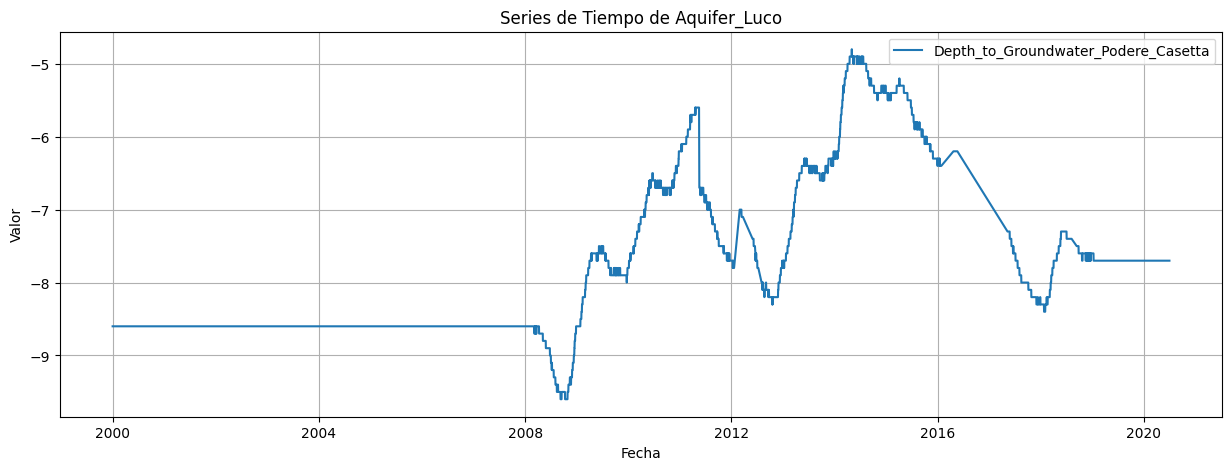


Matriz de correlación (heatmap) para las features relevantes y targets:


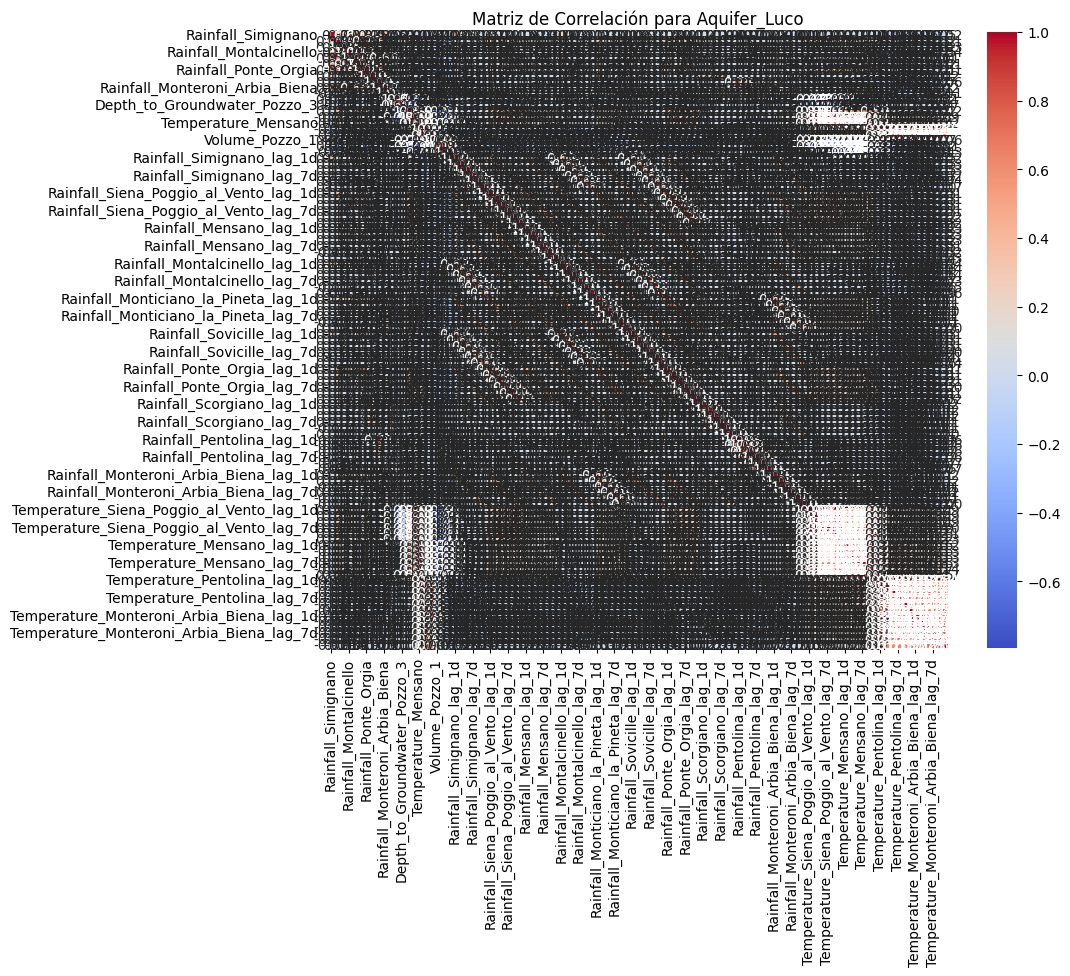


Observaciones clave del EDA:
  - [Escribe aquí las observaciones sobre tendencias, estacionalidad, valores atípicos, etc.]
  - [Escribe aquí cómo los lags de Rainfall/Temperature parecen correlacionarse con los targets.]

--- EDA para 'Water_Spring_Amiata' ---

Estadísticas descriptivas:
       Rainfall_Castel_del_Piano  Rainfall_Abbadia_S_Salvatore  \
count                7487.000000                   7487.000000   
mean                    2.359730                     25.943515   
std                     7.360066                     24.217005   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                     34.200000   
75%                     1.400000                     49.400000   
max                   149.600000                    228.500000   

       Rainfall_S_Fiora  Rainfall_Laghetto_Verde  Rainfall_Vetta_Amiata  \
count       7487.000000              748

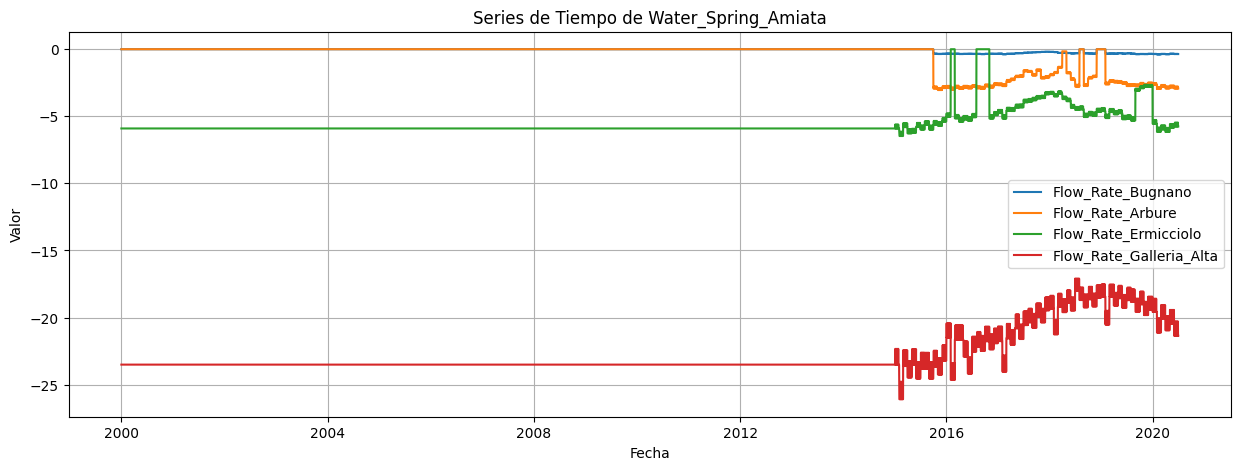


Matriz de correlación (heatmap) para las features relevantes y targets:


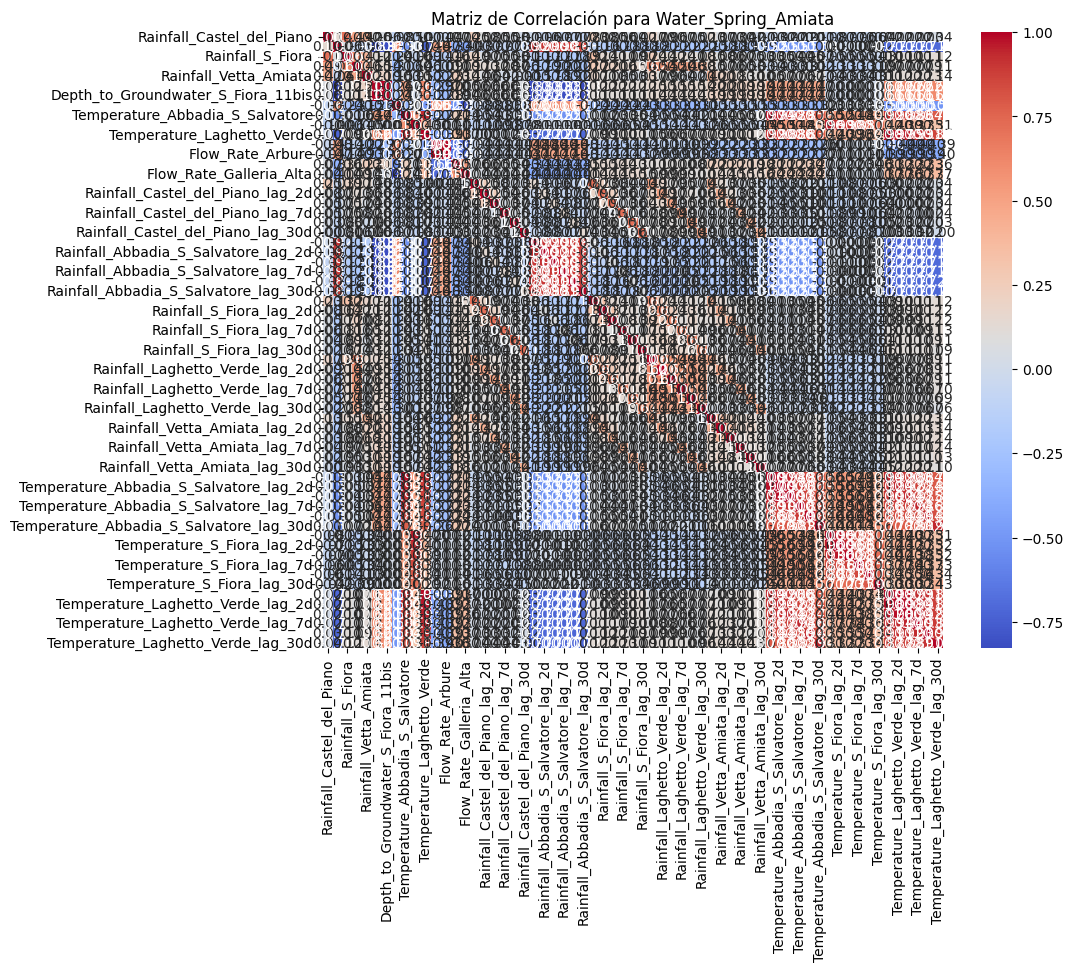


Observaciones clave del EDA:
  - [Escribe aquí las observaciones sobre tendencias, estacionalidad, valores atípicos, etc.]
  - [Escribe aquí cómo los lags de Rainfall/Temperature parecen correlacionarse con los targets.]

--- EDA para 'Water_Spring_Madonna_di_Canneto' ---

Estadísticas descriptivas:
       Rainfall_Settefrati  Temperature_Settefrati  \
count          3113.000000             3113.000000   
mean              3.492933               12.050418   
std               9.424330                7.091359   
min               0.000000               -4.900000   
25%               0.000000                5.100000   
50%               0.000000               10.850000   
75%               1.600000               17.750000   
max             140.800000               31.100000   

       Flow_Rate_Madonna_di_Canneto  Rainfall_Settefrati_lag_1d  \
count                   3113.000000                 3113.000000   
mean                     258.146523                    3.494055   
std       

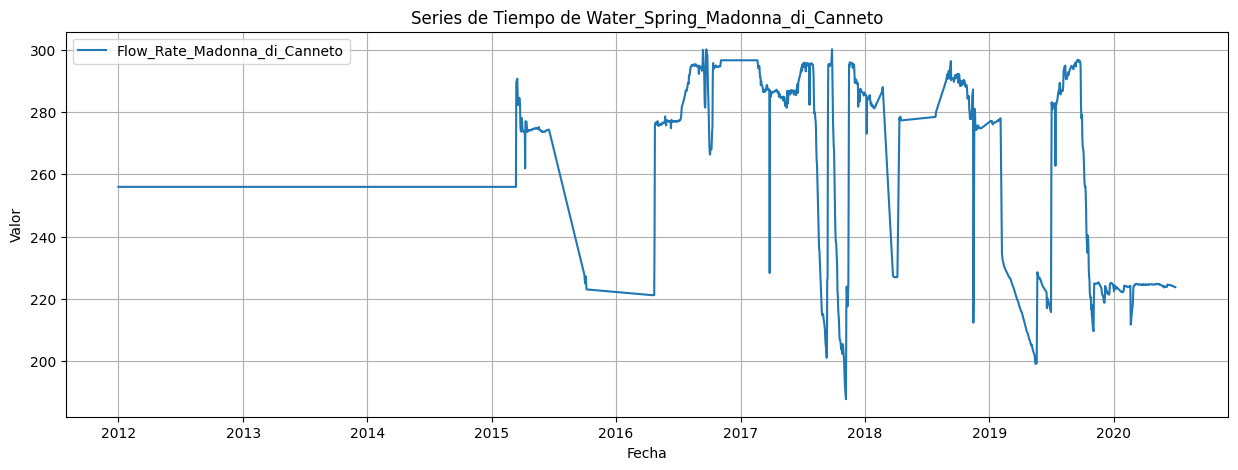


Matriz de correlación (heatmap) para las features relevantes y targets:


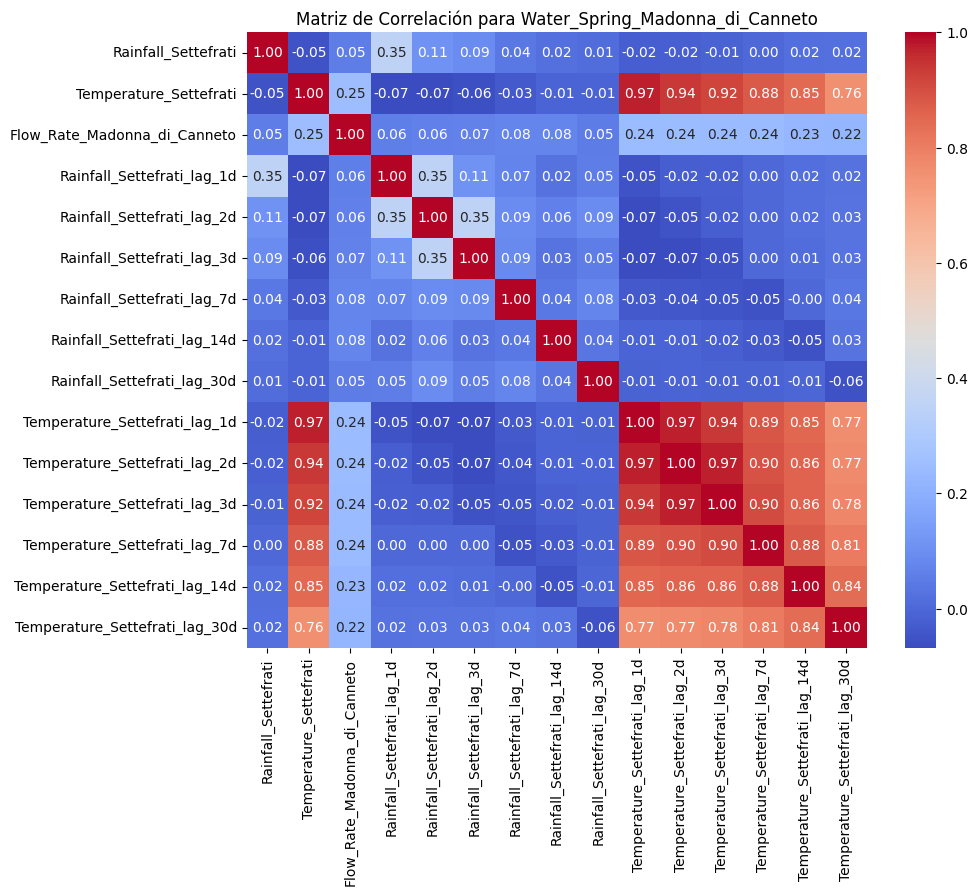


Observaciones clave del EDA:
  - [Escribe aquí las observaciones sobre tendencias, estacionalidad, valores atípicos, etc.]
  - [Escribe aquí cómo los lags de Rainfall/Temperature parecen correlacionarse con los targets.]

--- EDA para 'Water_Spring_Lupa' ---

Estadísticas descriptivas:
       Rainfall_Terni  Flow_Rate_Lupa  Rainfall_Terni_lag_1d  \
count     4199.000000     4199.000000            4199.000000   
mean         2.466355      -98.622345               2.466942   
std          2.041837       18.338444               2.041482   
min          0.000000     -182.310000               0.000000   
25%          1.402000     -106.105000               1.402000   
50%          2.142000      -96.330000               2.142000   
75%          3.165000      -86.385000               3.165000   
max         76.000000        0.000000              76.000000   

       Rainfall_Terni_lag_2d  Rainfall_Terni_lag_3d  Rainfall_Terni_lag_7d  \
count            4199.000000            4199.000000      

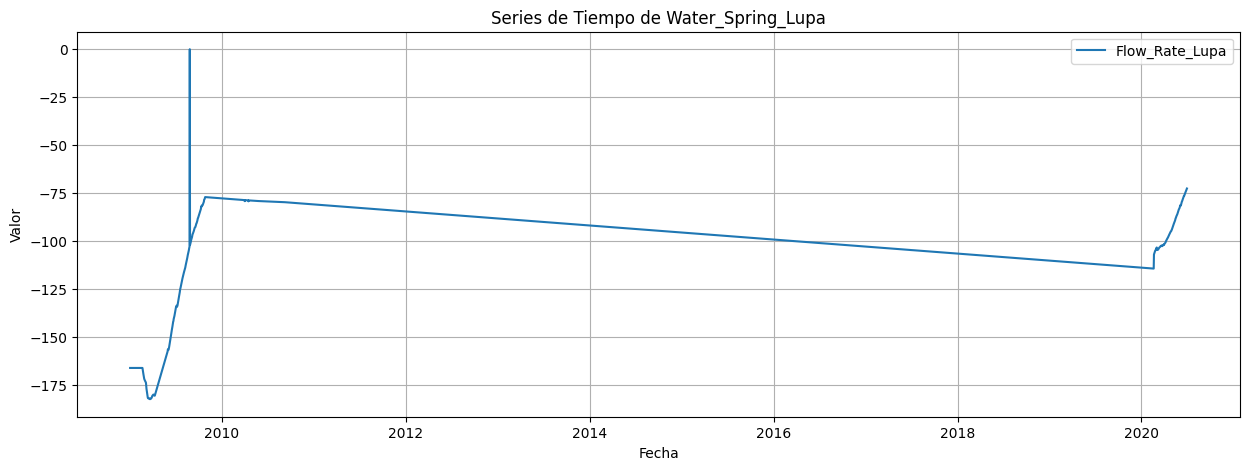


Matriz de correlación (heatmap) para las features relevantes y targets:


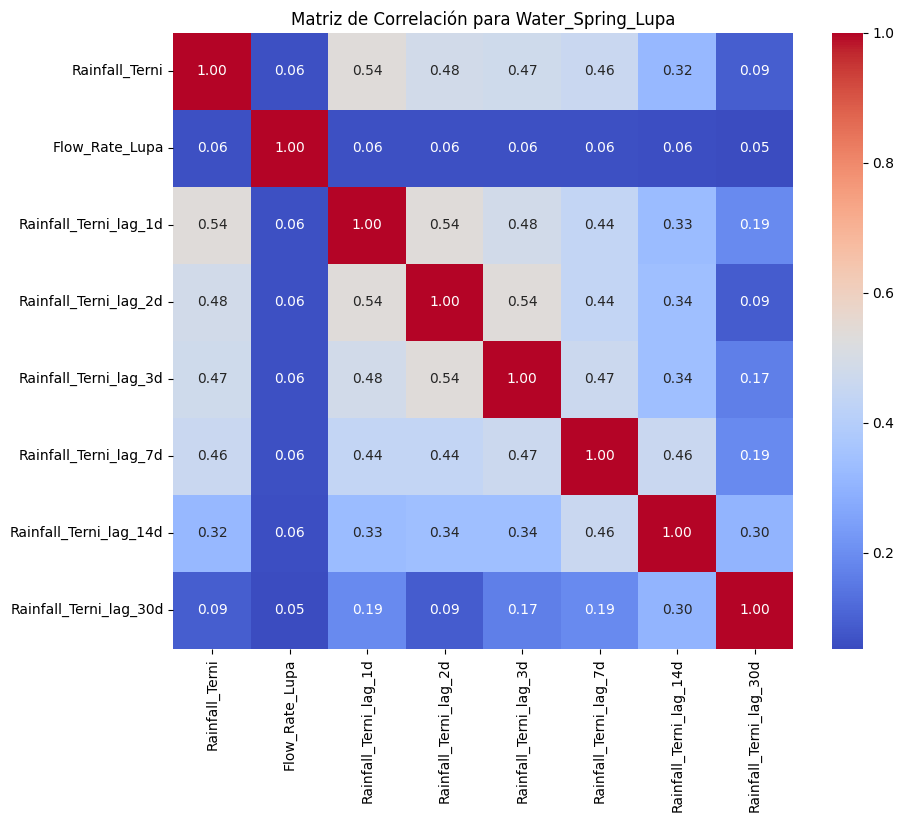


Observaciones clave del EDA:
  - [Escribe aquí las observaciones sobre tendencias, estacionalidad, valores atípicos, etc.]
  - [Escribe aquí cómo los lags de Rainfall/Temperature parecen correlacionarse con los targets.]

--- EDA para 'River_Arno' ---

Estadísticas descriptivas:
       Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
count        8217.000000         8217.000000       8217.000000   
mean            2.295315            1.961543          2.064768   
std             7.010266            6.661891          6.218677   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000          0.000000   
50%             0.000000            0.000000          0.200000   
75%             0.200000            0.000000          0.400000   
max            88.400000          113.600000        120.200000   

       Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  \
count       8217.000000       8217.000000      

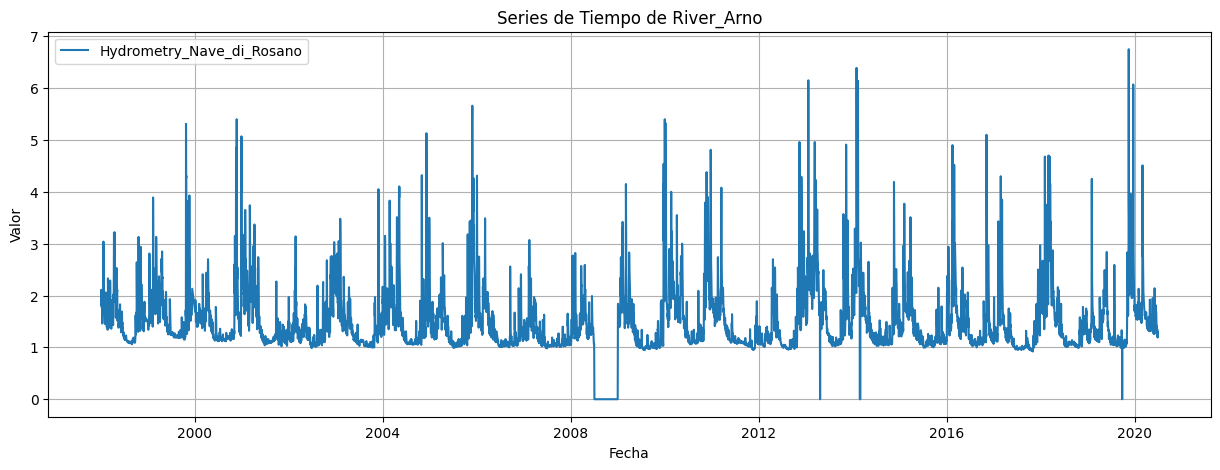


Matriz de correlación (heatmap) para las features relevantes y targets:


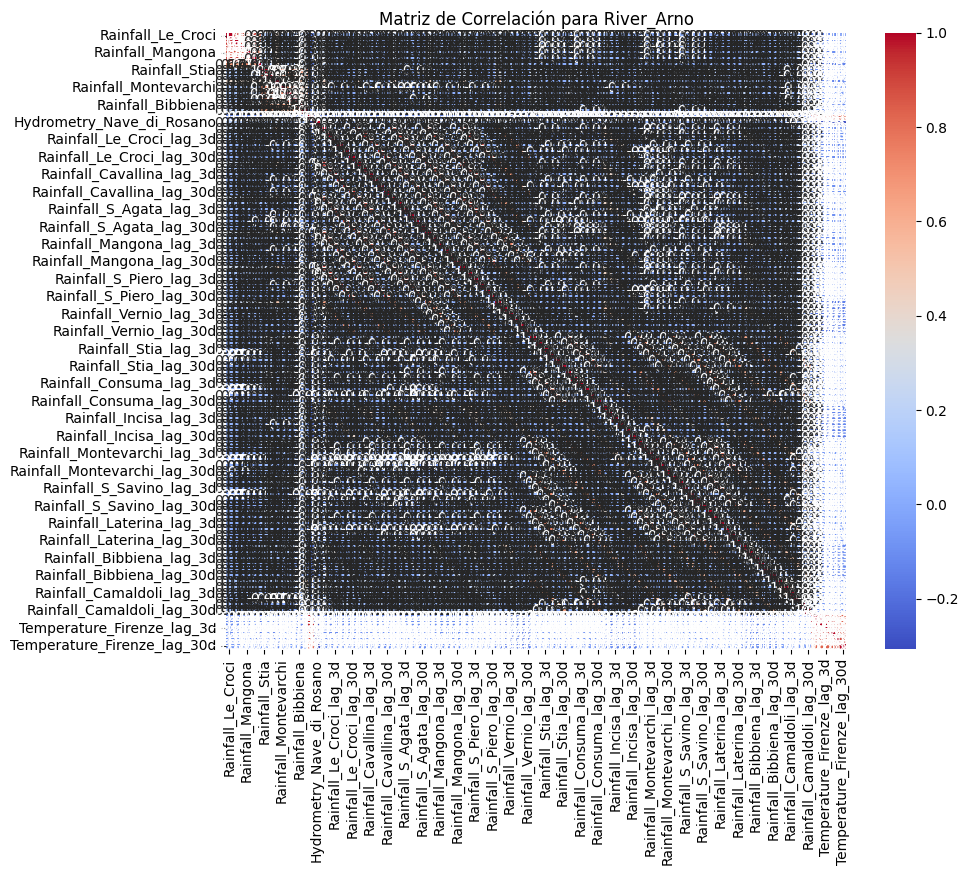


Observaciones clave del EDA:
  - [Escribe aquí las observaciones sobre tendencias, estacionalidad, valores atípicos, etc.]
  - [Escribe aquí cómo los lags de Rainfall/Temperature parecen correlacionarse con los targets.]

--- EDA para 'Lake_Bilancino' ---

Estadísticas descriptivas:
       Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
count       6603.000000       6603.000000       6603.000000   
mean           2.255278          3.048735          2.471695   
std            6.390993          8.557352          6.876261   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.600000          0.800000          0.800000   
max           80.600000        110.000000        120.200000   

       Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  \
count         6603.000000        6603.000000           6603.000000   
mean   

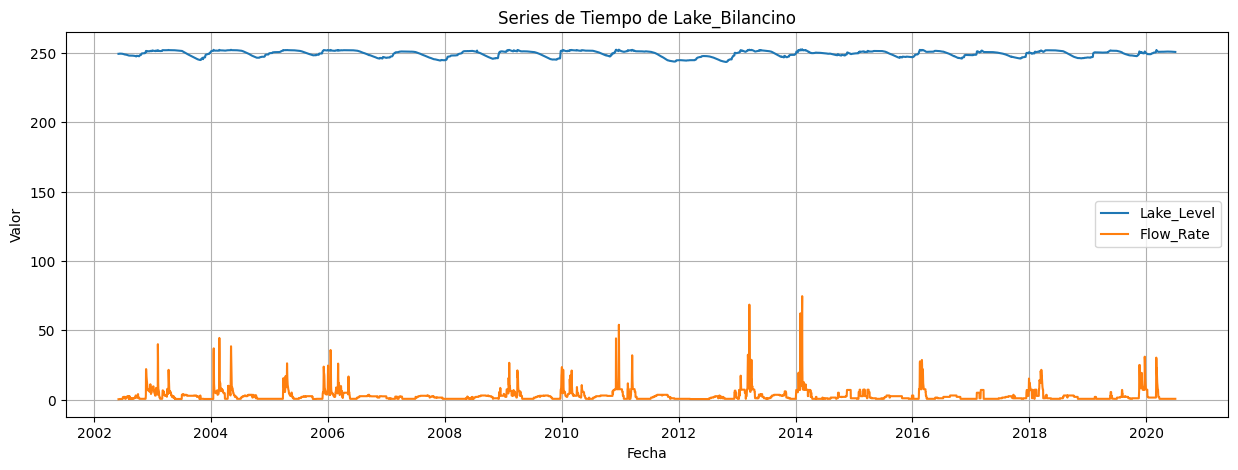


Matriz de correlación (heatmap) para las features relevantes y targets:


: 

In [51]:
print("\nIniciando Análisis Exploratorio de Datos (EDA)...")

eda_results = {}
# ESTE ES EL BUCLE QUE ASEGURA QUE SE PROCESEN TODOS LOS DATAFRAMES
for waterbody_name, df in df_processed.items():
    print(f"\n--- EDA para '{waterbody_name}' ---")
    eda_results[waterbody_name] = {}

    # 3.1. Estadísticas Descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    eda_results[waterbody_name]['describe'] = df.describe()

    # 3.2. Visualización de la serie de tiempo de las variables a predecir
    target_cols = waterbody_targets.get(waterbody_name, [])
    if target_cols:
        print(f"\nVisualizando series de tiempo para las variables a predecir: {target_cols}")
        plt.figure(figsize=(15, 5))
        for col in target_cols:
            if col in df.columns:
                plt.plot(df.index, df[col], label=col)
            else:
                print(f"  - Advertencia: La columna target '{col}' no se encontró en '{waterbody_name}'.")
        plt.title(f'Series de Tiempo de {waterbody_name}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 3.5. Matriz de Correlación
    print("\nMatriz de correlación (heatmap) para las features relevantes y targets:")
    features_and_targets = [col for col in df.columns if col in target_cols or 'Rainfall' in col or 'Temperature' in col or 'Volume' in col or 'Hydrometry' in col or 'Depth' in col or 'Flow_Rate' in col]
    corr_matrix = df[features_and_targets].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Matriz de Correlación para {waterbody_name}')
    plt.show()
    eda_results[waterbody_name]['correlation_matrix'] = corr_matrix

    # 3.6. Discusión de patrones y anomalías
    print("\nObservaciones clave del EDA:")
    print("  - [Escribe aquí las observaciones sobre tendencias, estacionalidad, valores atípicos, etc.]")
    print("  - [Escribe aquí cómo los lags de Rainfall/Temperature parecen correlacionarse con los targets.]")


Iniciando Análisis Exploratorio de Datos (EDA)...

--- EDA para 'Lake_Bilancino' ---

Estadísticas descriptivas:
       Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
count       6603.000000       6603.000000       6603.000000   
mean           2.255278          3.048735          2.471695   
std            6.390993          8.557352          6.876261   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.600000          0.800000          0.800000   
max           80.600000        110.000000        120.200000   

       Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  \
count         6603.000000        6603.000000           6603.000000   
mean             2.441012           2.856368             13.827215   
std              7.352554           7.717206              7.010651   
min              0.000000           0.

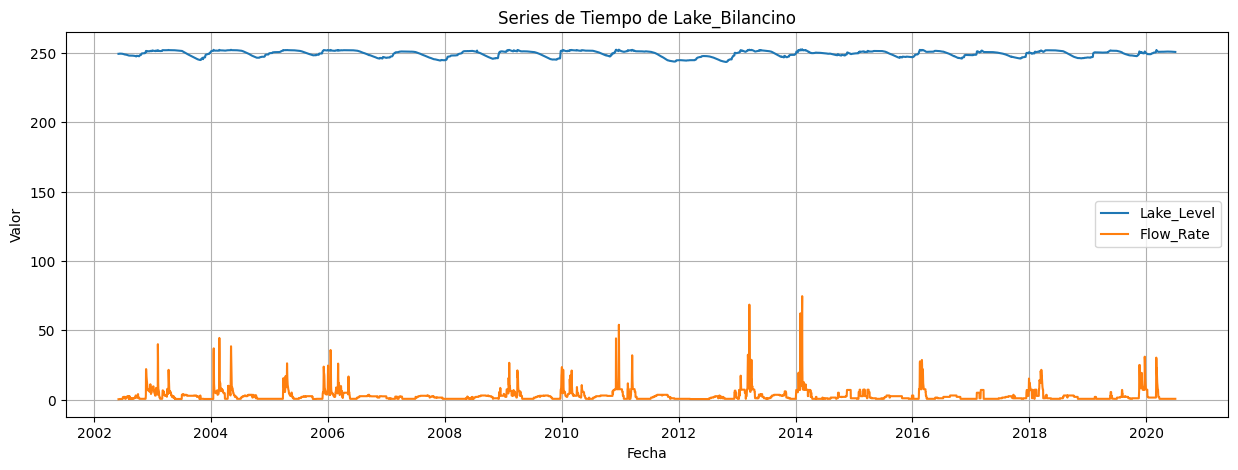

In [39]:
print("\nIniciando Análisis Exploratorio de Datos (EDA)...")

eda_results = {}
# Este bucle iterará sobre TODOS los DataFrames en df_processed
for waterbody_name, df in df_processed.items():
    print(f"\n--- EDA para '{waterbody_name}' ---")
    eda_results[waterbody_name] = {}

    # 3.1. Estadísticas Descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    eda_results[waterbody_name]['describe'] = df.describe()

    # (Aquí iría el resto del código EDA para visualizaciones, etc.)
    # 3.2. Visualización de la serie de tiempo de las variables a predecir
    target_cols = waterbody_targets.get(waterbody_name, [])
    if target_cols:
        print(f"\nVisualizando series de tiempo para las variables a predecir: {target_cols}")
        plt.figure(figsize=(15, 5))
        for col in target_cols:
            if col in df.columns:
                plt.plot(df.index, df[col], label=col)
            else:
                print(f"  - Advertencia: La columna target '{col}' no se encontró en '{waterbody_name}'.")
        plt.title(f'Series de Tiempo de {waterbody_name}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True)
        plt.show()

In [38]:
print("\nIniciando Análisis Exploratorio de Datos (EDA) para un subconjunto...")
eda_results = {}

# Elige solo uno o dos cuerpos de agua para mostrar la salida
selected_waterbodies = ['Aquifer_Auser',] # Puedes cambiar esto

for waterbody_name in selected_waterbodies:
    if waterbody_name in df_processed:
        df = df_processed[waterbody_name]
        print(f"\n--- EDA para '{waterbody_name}' ---")
        eda_results[waterbody_name] = {}

        # 3.1. Estadísticas Descriptivas
        print("\nEstadísticas descriptivas:")
        print(df.describe())
        eda_results[waterbody_name]['describe'] = df.describe()

        # ... (resto del código EDA para este cuerpo de agua, como visualizaciones)
        # Visualización de la serie de tiempo de las variables a predecir
        target_cols = waterbody_targets.get(waterbody_name, [])
        if target_cols:
            print(f"\nVisualizando series de tiempo para las variables a predecir: {target_cols}")
            plt.figure(figsize=(15, 5))
            for col in target_cols:
                if col in df.columns:
                    plt.plot(df.index, df[col], label=col)
                else:
                    print(f"  - Advertencia: La columna target '{col}' no se encontró en '{waterbody_name}'.")
            plt.title(f'Series de Tiempo de {waterbody_name}')
            plt.xlabel('Fecha')
            plt.ylabel('Valor')
            plt.legend()
            plt.grid(True)
            plt.show()



Iniciando Análisis Exploratorio de Datos (EDA) para un subconjunto...


In [ ]:
print("\nIniciando Análisis Exploratorio de Datos (EDA) para un subconjunto...")
eda_results = {}

# Elige solo uno o dos cuerpos de agua para mostrar la salida
selected_waterbodies = ['Aquifer_Auser', 'Lake_Bilancino'] # Puedes cambiar esto

for waterbody_name in selected_waterbodies:
    if waterbody_name in df_processed:
        df = df_processed[waterbody_name]
        print(f"\n--- EDA para '{waterbody_name}' ---")
        eda_results[waterbody_name] = {}

        # 3.1. Estadísticas Descriptivas
        print("\nEstadísticas descriptivas:")
        print(df.describe())
        eda_results[waterbody_name]['describe'] = df.describe()

        # ... (resto del código EDA para este cuerpo de agua, como visualizaciones)
        # Visualización de la serie de tiempo de las variables a predecir
        target_cols = waterbody_targets.get(waterbody_name, [])
        if target_cols:
            print(f"\nVisualizando series de tiempo para las variables a predecir: {target_cols}")
            plt.figure(figsize=(15, 5))
            for col in target_cols:
                if col in df.columns:
                    plt.plot(df.index, df[col], label=col)
                else:
                    print(f"  - Advertencia: La columna target '{col}' no se encontró en '{waterbody_name}'.")
            plt.title(f'Series de Tiempo de {waterbody_name}')
            plt.xlabel('Fecha')
            plt.ylabel('Valor')
            plt.legend()
            plt.grid(True)
            plt.show()

        # Matriz de Correlación
        print("\nMatriz de correlación (heatmap) para las features relevantes y targets:")
        features_and_targets = [col for col in df.columns if col in target_cols or 'Rainfall' in col or 'Temperature' in col or 'Volume' in col or 'Hydrometry' in col or 'Depth' in col or 'Flow_Rate' in col]
        corr_matrix = df[features_and_targets].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Matriz de Correlación para {waterbody_name}')
        plt.show()
        eda_results[waterbody_name]['correlation_matrix'] = corr_matrix

    else:
        print(f"Advertencia: '{waterbody_name}' no encontrado en df_processed.")